<a href="https://colab.research.google.com/github/abkimc/CV-course-test-preparation/blob/main/Image_processing_lecture_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

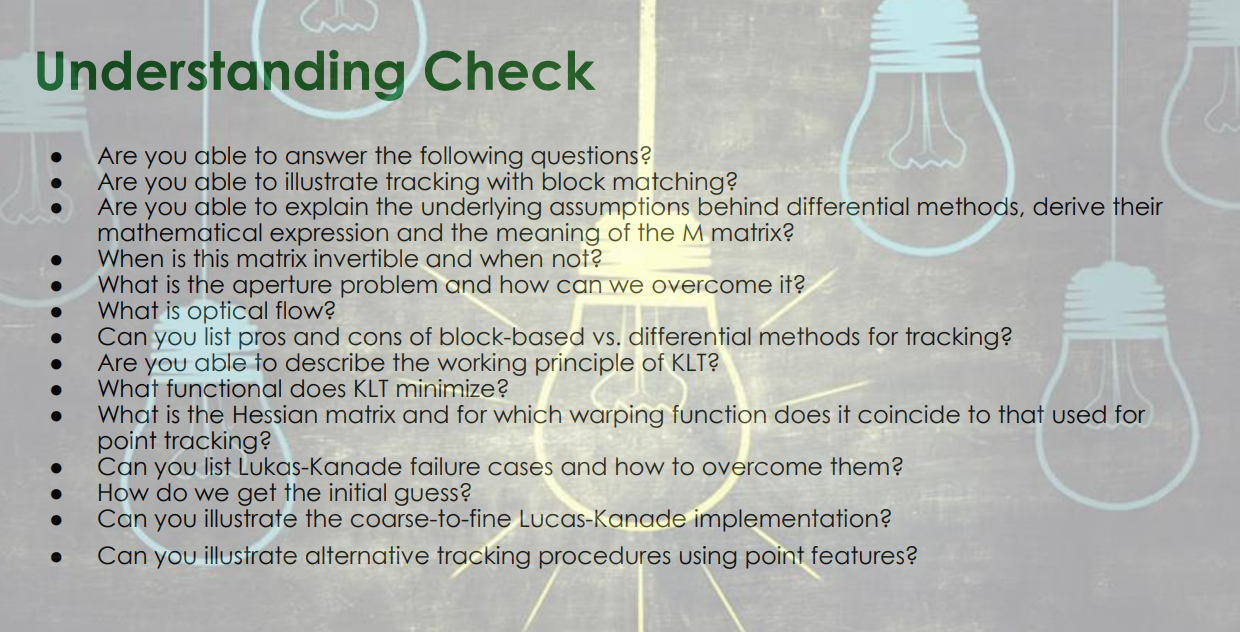

In [ ]:
# 2. Are you able to illustrate tracking with block matching?

"""
Block matching is a technique used to track motion between two consecutive frames in a video. It finds where a small block of pixels (e.g., 16x16) from the first frame has moved in the next frame.

How It Works:
Pick a Block: Choose a small block of pixels in the first frame.

Search Area: Look for this block in a larger area of the next frame.

Compare Blocks: Slide the block over the search area and compare it with candidate blocks using a similarity measure.

Find Best Match: The position with the closest match is the new location of the block.

Motion Vector: The movement of the block is described by a motion vector (direction and distance).
"""


# 4. When is this matrix invertible and when not?

"""
We say that a square matrix is invertible if and only if the determinant is not equal to zero.
 In other words, a 2 x 2 matrix is only invertible if the determinant of the matrix is not 0.
"""

# 5. What is the aperture problem and how can we overcome it?

"""
The aperture problem arises in computer
vision when trying to determine the
motion of an object through a small,
limited field of view (an "aperture"). It
occurs because motion observed
through a small aperture (or a small
portion of an image) can only be
determined in the direction
perpendicular to the object's edge or
feature, leading to an ambiguity in the
true direction of motion
"""

# 6. What is optical flow?

"""
Optical flow is a powerful technique in
computer vision that estimates the motion of
objects and scenes across consecutive
frames. It models pixel displacements,
producing a flow field that describes how
the scene changes over time.
"""

# 7. Can you list pros and cons of block-based vs. differential methods for tracking?

"""
Pros:
• Simplicity: The algorithm is straightforward to
implement.
• Efficiency: Block matching works well for realtime applications with small
search window size.
• Robustness: Effective in cases of small motions
and low computational requirements.

Cons:
• Large Motion: The search window may not
cover the displacement if the
object moves significantly
between frames.
• Lighting Changes: Variations in illumination can
affect the similarity measures.
• Computational Cost: Larger search windows or smaller
block sizes increase the computational load.


Differential methods:
● Works only for small motions (e.g., high frame rate). Multi-scale Implementations are used
for larger motions but are more expensive (see later).
● Much more efficient than block-based methods. Thus, it can track the motion of every
pixel in the image (i.e., optical flow). It avoids searching in the neighborhood of the point
by analyzing the local intensity changes (i.e., differences) of an image patch at a
specific location (i.e., no search is performed).
"""

# 8. Are you able to describe the working principle of KLT?

"""
It combines two key concepts:
1.Lucas-Kanade Optical Flow for motion estimation.
2.Tomasi-Kanade feature selection for identifying good features to track.


Point Selection (Feature Detection):
• The KLT tracker begins by identifying points of interest in the initial frame. These points are
typically chosen using the Shi-Tomasi corner detection method, which ensures that the
selected features are well-defined (e.g., corners or textured regions) for reliable tracking.
Optical Flow Calculation:
• Once the features are identified, the algorithm uses the Lucas-Kanade optical flow
method to estimate their motion between consecutive frames. This approach assumes:
Brightness Constancy:
• The intensity of a pixel remains constant between frames.
• Small Motion: The displacement between frames is small and linear.
• Spatial Coherence: Neighboring pixels have similar motions



"""

# 9. What functional does KLT minimize?

"""
The Kanade-Lucas-Tomasi (KLT) tracker finds the movement of a small patch of an image between two frames by minimizing the difference in intensity (brightness) of corresponding pixels.

In simple terms, it tries to find the best shift (𝑑𝑥,𝑑𝑦) that makes the new patch in the next frame look as similar as possible to the original one.
It does this by minimizing the sum of squared differences between pixel values before and after the shift.
"""

# 10. What is the Hessian matrix and for which warping function does it coincide to that used for point tracking?

"""
The Hessian matrix is a square matrix of second-order partial derivatives of a scalar function. It describes the local curvature of a function and is widely used in optimization, computer vision, and differential geometry.
"""

# 11. Can you list Lucas-Kanade failure cases and how to overcome them?

"""
Large Motion (Violation of Small Motion Assumption)
Solution: Use image pyramids to track motion at multiple scales.

Low Texture or Uniform Regions (Poor Gradient Information)
Solution: Apply Harris corner detection to select good feature points.

Occlusion or Drift Over Time
Solution: Incorporate RANSAC or model-based constraints to filter outliers.

Rotation & Scaling (Affine Transformations Not Accounted for)
Solution: Use an affine or homography-based tracking model instead of pure translation.

Illumination Changes (Brightness Constancy Assumption Fails)
Solution: Normalize intensity, use gradient-based methods, or adopt photometric invariants.

Motion Blur
Solution: Increase temporal resolution or use deblurring techniques before tracking.
"""

# 12. How do we get the initial guess?

"""
the initial guess for the optical flow is obtained by assuming small motion between consecutive frames. Here’s how it's typically done:

Previous Frame’s Feature Location:

The point's location in the last frame is used as the initial estimate for its position in the new frame.
Pyramidal Approach (if used):

Start tracking from the coarsest level of the image pyramid and refine the estimate as you move to finer levels.
Prediction from Motion Model (if available):

If a global motion model (e.g., affine or homography) is known, it can be used to predict the new location.
This initial guess is then refined iteratively using the Lucas-Kanade method to minimize the intensity difference.
"""

# 13. Can you illustrate the coarse-to-fine Lucas-Kanade implementation?

"""
The coarse-to-fine strategy uses a pyramid representation of the images to handle large displacements. Here's how it works:

Step-by-Step Illustration
Step 1: Build Image Pyramids
Create Gaussian pyramids for both frames (Frame t and Frame t+1).

A pyramid is a series of images at different resolutions, starting from the original (fine) and progressively downsampled (coarse).
Step 2: Start at the Coarsest Level
Begin motion estimation at the coarsest level (lowest resolution) of the pyramid.

At this level, large displacements appear smaller due to downsampling, making them easier to estimate.

Step 3: Estimate Motion at Coarse Level
Apply the classic Lucas-Kanade algorithm to estimate the motion (optical flow) at the coarse level.

This gives an approximate motion vector for each pixel.

Step 4: Propagate Motion to Finer Levels
Upsample the motion vectors from the coarse level to the next finer level.

Use these upsampled vectors as an initial guess for motion estimation at the finer level.

Step 5: Refine Motion at Finer Levels
At each finer level, refine the motion vectors using the Lucas-Kanade algorithm.

Repeat this process until reaching the finest level (original resolution).

Step 6: Final Motion Vectors
The motion vectors at the finest level represent the final optical flow between the two frames.


"""

# 14. Can you illustrate alternative tracking procedures using point features?

"""
1. SIFT (Scale-Invariant Feature Transform)
Procedure:
Detect key points at multiple scales using a difference of Gaussian (DoG).
Extract distinctive descriptors around these key points.
Match features between frames using a nearest neighbor approach.
Track features using matching scores and geometrical transformations (e.g., RANSAC for robust matching).
Strengths: Robust to scale, rotation, and partial occlusion.
Weaknesses: Computationally expensive and requires more processing power.

2. SURF (Speeded Up Robust Features)
Procedure:
Similar to SIFT but optimized for speed by using integral images for fast computation.
Detect key points and extract descriptors.
Match key points across frames and refine using RANSAC.
Strengths: Faster than SIFT and robust to scale, rotation, and affine transformations.
Weaknesses: Still relatively computationally expensive compared to simpler methods.

3. ORB (Oriented FAST and Rotated BRIEF)
Procedure:
Detect feature points using the FAST corner detector.
Use BRIEF (Binary Robust Independent Elementary Features) to extract descriptors.
Match features and refine using geometrical constraints.
Strengths: Fast, efficient, and computationally lightweight.
Weaknesses: Less robust to changes in scale and lighting compared to SIFT and SURF.

4. Discriminative Correlation Filter (DCF)
Procedure:
Track points by learning a correlation filter based on the target appearance.
Use a template to find the location of the target in the current frame.
Apply DCF tracking to the selected points using learned filters.
Strengths: Fast and works well for real-time tracking.
Weaknesses: Can fail in the presence of occlusions or dramatic motion changes.

5. Feature-Based Tracking Using Optical Flow (Block Matching)
Procedure:
Use dense optical flow methods (e.g., Farneback, Horn-Schunck) to track points across frames.
Track individual points or small patches by matching intensities between frames.
Strengths: Can track a large number of points, simple to implement.
Weaknesses: Susceptible to noise, and may not perform well in cases of large displacement or occlusion.

6. Deep Learning-Based Methods
Procedure:
Use neural networks such as Siamese Networks or Deep Matching to track points by learning appearance features.
These networks can be trained to handle more complex transformations and track points more robustly.
Strengths: Very robust to challenges like large motion, illumination changes, and occlusion.
Weaknesses: Requires a large dataset for training, and computationally intensive.
"""


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import time

# Upload a video file manually or use a default one
video_path = "horse.mp4"  # Change to your uploaded video file

# Parameters for Shi-Tomasi corner detection
feature_params = dict(maxCorners=500, qualityLevel=0.6, minDistance=1, blockSize=13)

# Parameters for Lucas-Kanade optical flow
lk_params = dict(winSize=(15, 15), maxLevel=3,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Initialize video capture
cap = cv2.VideoCapture(video_path)

# Get the first frame and find good features to track
ret, old_frame = cap.read()
gray_old = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(gray_old, mask=None, **feature_params)

# Create a mask for drawing motion trails
mask = np.zeros_like(old_frame)

# Define the video writer
output_path = "klt_output.avi"
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, 20.0, (old_frame.shape[1], old_frame.shape[0]))

frame_count = 0
max_frames = 100  # Process only 100 frames for demo purposes

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    gray_new = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(gray_old, gray_new, p0, None, **lk_params)

    # Select good points
    if p1 is not None:
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        # Draw tracks
        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
            frame = cv2.circle(frame, (int(a), int(b)), 5, (0, 0, 255), -1)

        img = cv2.add(frame, mask)
        out.write(img)

        # Update previous frame and points
        gray_old = gray_new.copy()
        p0 = good_new.reshape(-1, 1, 2)

    frame_count += 1

cap.release()
out.release()
# Convert to a format Colab can display


from moviepy.editor import *

path="/content/klt_output.avi"

clip=VideoFileClip(path)
clip.ipython_display(width=500)



Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
